In [1]:
import numpy as np
import pandas as pd
import time
import tensorflow_decision_forests as tfdf

2023-03-29 15:59:53.144974: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
def load_tfds(data_path: str, label_: str = 'class'):
   start_time = time.time()
   df = pd.read_csv(data_path, nrows = None)
   ds = tfdf.keras.pd_dataframe_to_tf_dataset(df, label=label_)
   load_time = time.time()-start_time

   return ds, load_time

In [3]:
train_ds, train_load_time = load_tfds('../Data/jet_images_c8_pt2.0_andre_train.csv')
print(f'Loaded training sample of {len(train_ds)} jets in {train_load_time:.3f}s')

test_ds, test_load_time = load_tfds('../Data/jet_images_c8_pt2.0_andre_test.csv')
print(f'Loaded testing sample of {len(test_ds)} jets in {test_load_time:.3f}s')

2023-03-29 16:03:29.821040: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Loaded training sample of 620 jets in 177.214s
Loaded testing sample of 260 jets in 69.711s


In [4]:
def load_tfds_(data_path: str, name:str = None, label_: str = 'class'):
   start_time = time.time()
   df = pd.read_csv(data_path, nrows = None)
   ds = tfdf.keras.pd_dataframe_to_tf_dataset(df, label=label_)
   load_time = time.time()-start_time

   if name is not None:
      print(f'Loaded {name} sample of {len(df)} jets in {load_time:.3f}s')

   return ds

In [8]:
ds = load_tfds_('../Data/jet_images_c8_pt2.0_andre_train.csv', name= 'testing')

Loaded testing sample of 620000 jets in 177.461s


In [7]:
ds

<PrefetchDataset element_spec=({'c0_pT': TensorSpec(shape=(None,), dtype=tf.float64, name=None), 'c0_eta_rel': TensorSpec(shape=(None,), dtype=tf.float64, name=None), 'c0_phi_rel': TensorSpec(shape=(None,), dtype=tf.float64, name=None), 'c1_pT': TensorSpec(shape=(None,), dtype=tf.float64, name=None), 'c1_eta_rel': TensorSpec(shape=(None,), dtype=tf.float64, name=None), 'c1_phi_rel': TensorSpec(shape=(None,), dtype=tf.float64, name=None), 'c2_pT': TensorSpec(shape=(None,), dtype=tf.float64, name=None), 'c2_eta_rel': TensorSpec(shape=(None,), dtype=tf.float64, name=None), 'c2_phi_rel': TensorSpec(shape=(None,), dtype=tf.float64, name=None), 'c3_pT': TensorSpec(shape=(None,), dtype=tf.float64, name=None), 'c3_eta_rel': TensorSpec(shape=(None,), dtype=tf.float64, name=None), 'c3_phi_rel': TensorSpec(shape=(None,), dtype=tf.float64, name=None), 'c4_pT': TensorSpec(shape=(None,), dtype=tf.float64, name=None), 'c4_eta_rel': TensorSpec(shape=(None,), dtype=tf.float64, name=None), 'c4_phi_rel':

In [9]:
train_starting_time = time.time()
train_df = pd.read_csv('../Data/jet_images_c8_pt2.0_andre_train.csv', nrows = None)
train_load_time = time.time()-train_starting_time
print(f'Loaded training sample of {len(train_df)} jets in {train_load_time:.3f}s')

test_starting_time = time.time()
test_df = pd.read_csv('../Data/jet_images_c8_pt2.0_andre_test.csv', nrows = None)
test_load_time = time.time()-test_starting_time
print(f'Loaded testing sample of {len(test_df)} jets in {test_load_time:.3f}s')

Loaded training sample of 620000 jets in 4.228s
Loaded testing sample of 260000 jets in 73.471s


In [3]:
train_df

,c0_pT,c0_eta_rel,c0_phi_rel,c1_pT,c1_eta_rel,c1_phi_rel,c2_pT,c2_eta_rel,c2_phi_rel,c3_pT,...,c5_pT,c5_eta_rel,c5_phi_rel,c6_pT,c6_eta_rel,c6_phi_rel,c7_pT,c7_eta_rel,c7_phi_rel,class
0,127.170784,0.001834,-0.014956,108.677773,0.000709,-0.013420,89.533981,-0.006970,-0.012862,82.854065,...,78.606422,0.002182,-0.002786,68.779770,0.018643,-0.016875,29.332670,0.008509,-0.013312,b'g'
1,277.407898,-0.015373,-0.017715,79.854210,-0.012873,-0.020216,74.960220,-0.026450,-0.012522,72.056015,...,48.487492,-0.022873,-0.025219,45.293770,-0.022873,-0.010211,45.081135,-0.018989,-0.021100,b'w'
2,70.972809,0.036545,0.081963,67.218811,0.038624,0.069400,49.024307,-0.200151,-0.001620,42.727558,...,38.735580,0.036545,0.071958,38.659615,-0.223524,0.006875,35.834946,0.216545,-0.183172,b'g'
3,559.684448,-0.010916,-0.051404,161.477982,0.029084,0.138693,90.419510,-0.019160,-0.048764,32.389412,...,25.729921,-0.013170,0.022238,24.437622,-0.013416,-0.053905,18.806957,0.001584,0.111179,b'z'
4,217.392563,-0.122969,0.014416,152.610535,0.080669,-0.017567,101.869621,0.102799,-0.006134,77.217911,...,36.433201,0.086130,-0.011223,29.143293,0.079167,-0.015268,28.700176,0.095669,-0.027572,b't'
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
619995,162.321442,-0.109834,0.024973,127.598358,-0.114834,0.019971,115.335396,0.229465,-0.065023,68.611946,...,47.893639,-0.112157,0.019235,45.063622,-0.112481,0.031176,35.236385,0.235476,-0.052078,b't'
619996,214.436722,-0.016063,0.044187,137.480835,-0.017454,0.043955,101.513351,-0.023984,0.043693,79.496208,...,61.498901,0.052841,-0.100248,59.911545,-0.021378,0.042438,48.713058,0.050267,-0.093899,b'w'
619997,85.169762,0.006348,-0.077123,82.310699,-0.020926,0.009409,63.253696,-0.083608,0.063904,61.558960,...,39.643116,0.040148,0.049016,31.956434,-0.005010,-0.074949,29.238163,-0.049821,0.028737,b'g'
619998,724.892578,-0.001300,-0.002186,101.005707,-0.006734,0.000535,72.452377,-0.003800,-0.004687,51.773643,...,13.900049,0.006200,0.040335,12.920212,-0.007925,-0.089420,10.400173,0.076497,-0.064242,b'q'


In [10]:
train_ds = tfdf.keras.pd_dataframe_to_tf_dataset(train_df, label='class')
test_ds = tfdf.keras.pd_dataframe_to_tf_dataset(test_df, label='class')

In [5]:
BDT_hyperparameters = {'num_trees':5,
                      'shrinkage':0.2,
                      'subsample':0.3,
                      'use_hessian_gain':True,
                      'growing_strategy':'BEST_FIRST_GLOBAL',
                      'max_depth':-1,
                      'max_num_nodes':32
                     }

In [6]:
model = tfdf.keras.GradientBoostedTreesModel(**BDT_hyperparameters)

Use /var/folders/w6/ywy355d53p1fqw8pn8ng6xn80000gn/T/tmp1k80l1qz as temporary training directory


In [7]:
model.fit(train_ds, verbose = 2)

Reading training dataset...
Training tensor examples:
Features: {'c0_pT': <tf.Tensor 'data_1:0' shape=(None,) dtype=float64>, 'c0_eta_rel': <tf.Tensor 'data:0' shape=(None,) dtype=float64>, 'c0_phi_rel': <tf.Tensor 'data_2:0' shape=(None,) dtype=float64>, 'c1_pT': <tf.Tensor 'data_4:0' shape=(None,) dtype=float64>, 'c1_eta_rel': <tf.Tensor 'data_3:0' shape=(None,) dtype=float64>, 'c1_phi_rel': <tf.Tensor 'data_5:0' shape=(None,) dtype=float64>, 'c2_pT': <tf.Tensor 'data_7:0' shape=(None,) dtype=float64>, 'c2_eta_rel': <tf.Tensor 'data_6:0' shape=(None,) dtype=float64>, 'c2_phi_rel': <tf.Tensor 'data_8:0' shape=(None,) dtype=float64>, 'c3_pT': <tf.Tensor 'data_10:0' shape=(None,) dtype=float64>, 'c3_eta_rel': <tf.Tensor 'data_9:0' shape=(None,) dtype=float64>, 'c3_phi_rel': <tf.Tensor 'data_11:0' shape=(None,) dtype=float64>, 'c4_pT': <tf.Tensor 'data_13:0' shape=(None,) dtype=float64>, 'c4_eta_rel': <tf.Tensor 'data_12:0' shape=(None,) dtype=float64>, 'c4_phi_rel': <tf.Tensor 'data_14:

Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


Normalized tensor features:
 {'c0_pT': SemanticTensor(semantic=<Semantic.NUMERICAL: 1>, tensor=<tf.Tensor 'Cast:0' shape=(None,) dtype=float32>), 'c0_eta_rel': SemanticTensor(semantic=<Semantic.NUMERICAL: 1>, tensor=<tf.Tensor 'Cast_1:0' shape=(None,) dtype=float32>), 'c0_phi_rel': SemanticTensor(semantic=<Semantic.NUMERICAL: 1>, tensor=<tf.Tensor 'Cast_2:0' shape=(None,) dtype=float32>), 'c1_pT': SemanticTensor(semantic=<Semantic.NUMERICAL: 1>, tensor=<tf.Tensor 'Cast_3:0' shape=(None,) dtype=float32>), 'c1_eta_rel': SemanticTensor(semantic=<Semantic.NUMERICAL: 1>, tensor=<tf.Tensor 'Cast_4:0' shape=(None,) dtype=float32>), 'c1_phi_rel': SemanticTensor(semantic=<Semantic.NUMERICAL: 1>, tensor=<tf.Tensor 'Cast_5:0' shape=(None,) dtype=float32>), 'c2_pT': SemanticTensor(semantic=<Semantic.NUMERICAL: 1>, tensor=<tf.Tensor 'Cast_6:0' shape=(None,) dtype=float32>), 'c2_eta_rel': SemanticTensor(semantic=<Semantic.NUMERICAL: 1>, tensor=<tf.Tensor 'Cast_7:0' shape=(None,) dtype=float32>), 'c2

[INFO 2023-03-29T11:19:26.323923+02:00 kernel.cc:756] Start Yggdrasil model training
[INFO 2023-03-29T11:19:26.326125+02:00 kernel.cc:757] Collect training examples
[INFO 2023-03-29T11:19:26.32644+02:00 kernel.cc:388] Number of batches: 620
[INFO 2023-03-29T11:19:26.326469+02:00 kernel.cc:389] Number of examples: 620000
[INFO 2023-03-29T11:19:26.527951+02:00 kernel.cc:774] Training dataset:
Number of records: 620000
Number of columns: 25

Number of columns by type:
	NUMERICAL: 24 (96%)
	CATEGORICAL: 1 (4%)

Columns:

NUMERICAL: 24 (96%)
	1: "c0_eta_rel" NUMERICAL mean:-2.32744e-05 min:-0.361332 max:0.360024 sd:0.0490376
	2: "c0_pT" NUMERICAL mean:240.026 min:25.1805 max:1559.19 sd:137.965
	3: "c0_phi_rel" NUMERICAL mean:6.63976e-05 min:-0.34712 max:0.376012 sd:0.0488032
	4: "c1_eta_rel" NUMERICAL mean:4.70047e-05 min:-0.409308 max:0.394555 sd:0.0539602
	5: "c1_pT" NUMERICAL mean:130.664 min:15.7215 max:784.306 sd:51.4711
	6: "c1_phi_rel" NUMERICAL mean:3.9146e-05 min:-0.367228 max:0.35

Model trained in 0:00:32.266286
Compiling model...
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Model compiled.


In [10]:
model.compile(metrics=["accuracy"])
evaluation = model.evaluate(test_ds, return_dict=True)
print()

for name, value in evaluation.items():
  print(f"{name}: {value:.4f}")

260/260 [==============================] - 9s 32ms/step - loss: 0.0000e+00 - accuracy: 0.5028

loss: 0.0000
accuracy: 0.5028


In [11]:
inspector = model.make_inspector()

In [12]:
print(f"Available variable importances:")
for importance in inspector.variable_importances().keys():
  print("\t", importance)

Available variable importances:
	 INV_MEAN_MIN_DEPTH
	 NUM_NODES
	 SUM_SCORE
	 NUM_AS_ROOT


In [22]:
inspector.variable_importances()['NUM_NODES']

[("c0_eta_rel" (1; #1), 93.0),
 ("c0_phi_rel" (1; #3), 85.0),
 ("c1_phi_rel" (1; #6), 70.0),
 ("c0_pT" (1; #2), 60.0),
 ("c7_pT" (1; #23), 59.0),
 ("c1_eta_rel" (1; #4), 49.0),
 ("c2_phi_rel" (1; #9), 43.0),
 ("c2_eta_rel" (1; #7), 35.0),
 ("c7_phi_rel" (1; #24), 30.0),
 ("c4_phi_rel" (1; #15), 27.0),
 ("c3_phi_rel" (1; #12), 26.0),
 ("c5_phi_rel" (1; #18), 25.0),
 ("c7_eta_rel" (1; #22), 22.0),
 ("c4_eta_rel" (1; #13), 21.0),
 ("c6_phi_rel" (1; #21), 20.0),
 ("c1_pT" (1; #5), 19.0),
 ("c3_eta_rel" (1; #10), 15.0),
 ("c5_eta_rel" (1; #16), 15.0),
 ("c6_eta_rel" (1; #19), 14.0),
 ("c2_pT" (1; #8), 12.0),
 ("c3_pT" (1; #11), 12.0),
 ("c4_pT" (1; #14), 9.0),
 ("c5_pT" (1; #17), 9.0),
 ("c6_pT" (1; #20), 5.0)]

In [14]:
model.save("Models/model_csv_test")

INFO:tensorflow:Assets written to: Models/model_csv_test/assets


INFO:tensorflow:Assets written to: Models/model_csv_test/assets


In [15]:
new_inspector = tfdf.inspector.make_inspector("Models/model_csv_test/assets/")

In [17]:
print(f"Available variable importances:")
for importance in new_inspector.variable_importances().keys():
  print("\t", importance)

Available variable importances:
	 INV_MEAN_MIN_DEPTH
	 NUM_NODES
	 SUM_SCORE
	 NUM_AS_ROOT


In [23]:
new_inspector.variable_importances()['SUM_SCORE']

[("c0_eta_rel" (1; #1), 11556069863.642517),
 ("c0_phi_rel" (1; #3), 10897665936.981628),
 ("c1_phi_rel" (1; #6), 8708122635.73407),
 ("c0_pT" (1; #2), 8028802544.169739),
 ("c7_pT" (1; #23), 7876745837.753021),
 ("c1_eta_rel" (1; #4), 6574489601.326508),
 ("c2_phi_rel" (1; #9), 4996433830.976318),
 ("c1_pT" (1; #5), 3781221385.458069),
 ("c2_eta_rel" (1; #7), 3453882946.345459),
 ("c4_phi_rel" (1; #15), 3018836651.981262),
 ("c3_phi_rel" (1; #12), 2603805261.445862),
 ("c4_eta_rel" (1; #13), 2374984208.373108),
 ("c7_phi_rel" (1; #24), 2316817864.6863403),
 ("c3_eta_rel" (1; #10), 1946885626.9151611),
 ("c5_phi_rel" (1; #18), 1525369749.5510254),
 ("c6_phi_rel" (1; #21), 1313763309.0111084),
 ("c6_eta_rel" (1; #19), 1087872218.1159668),
 ("c7_eta_rel" (1; #22), 1087339533.5441895),
 ("c5_eta_rel" (1; #16), 839843139.5079651),
 ("c3_pT" (1; #11), 826545211.8702393),
 ("c2_pT" (1; #8), 818219378.0327148),
 ("c6_pT" (1; #20), 774092673.5102539),
 ("c5_pT" (1; #17), 509321354.5769043),
 (

In [9]:
y_pred = model.predict(test_ds)

260/260 [==============================] - 7s 26ms/step


In [11]:
y_test = test_df['class']

In [12]:
print(y_test)

0         b'z'
1         b'g'
2         b'w'
3         b't'
4         b'w'
          ... 
259995    b't'
259996    b'q'
259997    b'w'
259998    b't'
259999    b'q'
Name: class, Length: 260000, dtype: object


In [13]:
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder

In [14]:
le = LabelEncoder()
y = le.fit_transform(y_test)
print(y)
y = to_categorical(y, 5)
print(y)

[4 0 3 ... 3 2 1]
[[0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0.]
 ...
 [0. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0.]]


In [15]:
print(y)

[[0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0.]
 ...
 [0. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0.]]


In [16]:
print(y_test)
print(le.classes_)

0         b'z'
1         b'g'
2         b'w'
3         b't'
4         b'w'
          ... 
259995    b't'
259996    b'q'
259997    b'w'
259998    b't'
259999    b'q'
Name: class, Length: 260000, dtype: object
["b'g'" "b'q'" "b't'" "b'w'" "b'z'"]


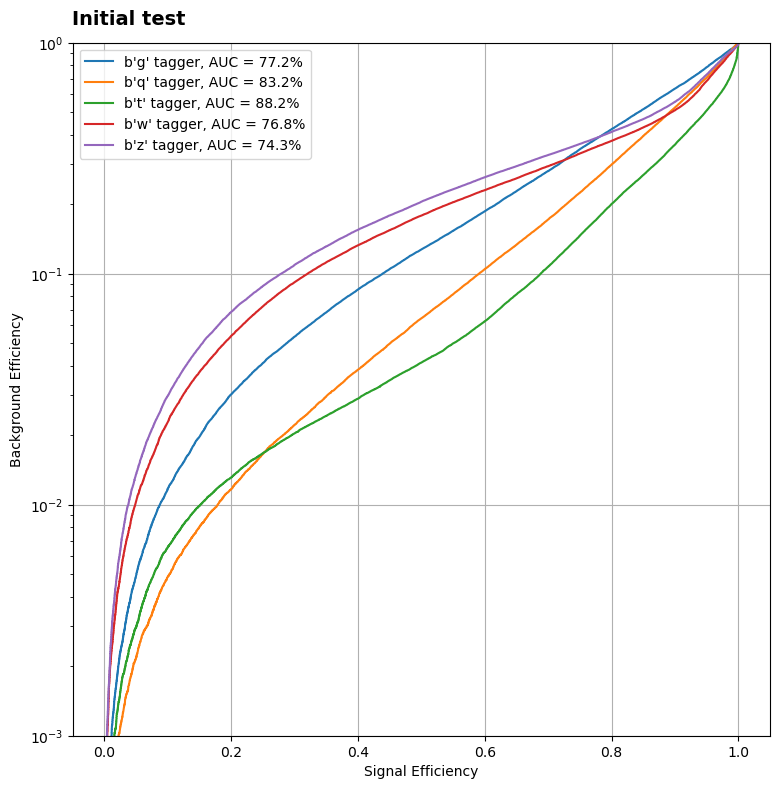

In [55]:
from sklearn.metrics import roc_curve, auc, accuracy_score
import matplotlib.pyplot as plt

#print(y_test)
#print('\n-----------\n')
#print(y_pred)

fpr = {}
tpr = {}
aucs = {}

for i, label in enumerate(le.classes_):
    #print(f'label = {label}')
    #print(f'i = {i}')
    #print(f'y_true = {y_test[:,i]}')
    #print(f'y_pred = {y_pred[:,i]}')
    fpr[label], tpr[label], threshold = roc_curve(y[:,i],y_pred[:,i])
    aucs[label] = auc(fpr[label],tpr[label])
    #print('\n--------------------------------\n')

fig, ax = plt.subplots(figsize=(9, 9))
for i, label in enumerate(le.classes_):
    plt.plot(tpr[label],fpr[label], label = f'{label} tagger, AUC = {aucs[label]*100:.1f}%')    
plt.semilogy()
plt.xlabel("Signal Efficiency")
plt.ylabel("Background Efficiency")
plt.ylim(0.001,1)
plt.grid(True)
plt.legend(loc='upper left')
plt.figtext(0.25, 0.90,'Initial test',fontweight='bold', wrap=True, horizontalalignment='right', fontsize=14)
#plt.savefig(args.plot_output_dir + args.plot_name)
#plt.savefig('Plots/test.png')
plt.show()

In [63]:
str(y_test)

'["b\'z\'" "b\'g\'" "b\'w\'" ... "b\'w\'" "b\'t\'" "b\'q\'"]'

In [59]:
classes = np.array([b"g", b"q", b"w", b"z", b"t"])
le = LabelEncoder().fit(classes)


In [60]:
le.classes_

array([b'g', b'q', b't', b'w', b'z'], dtype='|S1')

In [61]:
print(y_test.to_numpy)

AttributeError: 'numpy.ndarray' object has no attribute 'to_numpy'

In [62]:
print('started')
y_ohe = le.transform(y_test)
print(y_ohe)
y_ohe = to_categorical(y_ohe, 5)
print(y_ohe)

started


ValueError: y contains previously unseen labels: b'b'

In [72]:
str(y_test, encoding = 'UTF-8')

TypeError: decoding to str: need a bytes-like object, Series found

In [73]:
y_test

0         b'z'
1         b'g'
2         b'w'
3         b't'
4         b'w'
          ... 
259995    b't'
259996    b'q'
259997    b'w'
259998    b't'
259999    b'q'
Name: class, Length: 260000, dtype: object

In [76]:
y_test == b't'

0         False
1         False
2         False
3         False
4         False
          ...  
259995    False
259996    False
259997    False
259998    False
259999    False
Name: class, Length: 260000, dtype: bool

In [77]:
y_test.astype(bytes)

0         b"b'z'"
1         b"b'g'"
2         b"b'w'"
3         b"b't'"
4         b"b'w'"
           ...   
259995    b"b't'"
259996    b"b'q'"
259997    b"b'w'"
259998    b"b't'"
259999    b"b'q'"
Name: class, Length: 260000, dtype: bytes32

In [93]:
test_starting_time = time.time()
test_df = pd.read_csv('../Data/jet_images_c8_pt2.0_andre_test.csv', nrows = None, dtype = {'class': bytes})
test_load_time = time.time()-test_starting_time
print(f'Loaded testing sample of {len(test_df)} jets in {test_load_time:.3f}s')

Loaded testing sample of 260000 jets in 71.382s


In [94]:
y_test = test_df['class']

In [95]:
y_test

0         b'z'
1         b'g'
2         b'w'
3         b't'
4         b'w'
          ... 
259995    b't'
259996    b'q'
259997    b'w'
259998    b't'
259999    b'q'
Name: class, Length: 260000, dtype: object

In [97]:
y_test == "b'z'"

0          True
1         False
2         False
3         False
4         False
          ...  
259995    False
259996    False
259997    False
259998    False
259999    False
Name: class, Length: 260000, dtype: bool

In [81]:
classes

array([b'g', b'q', b'w', b'z', b't'], dtype='|S1')

bytes

In [84]:
classes = np.array([b"g", b"q", b"w", b"z", b"t"])

In [85]:
classes

array([b'g', b'q', b'w', b'z', b't'], dtype='|S1')